<a href="https://colab.research.google.com/github/marlapinkert/TEWA2/blob/main/07_roi_additional_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating ROIs - more detailed information

This notebook is supposed to give a short overview on


*   How to create ROI masks using coordinates
*   How to combine two ROIs into one mask
*   How to create a conjunction of two ROI masks




### Creating a mask using multiple coordinates

In [77]:
# Installing and importing dependencies

!pip install nilearn==0.9.2
!pip install nltools

from nilearn import datasets, plotting, image
from nltools.mask import create_sphere


First, lets create some ROI masks using coordinates. This is a revision from last session, however one thing is new: we are using `create_sphere()` with two instead of one set of coordinates. Of course, you could enter even more coordinates.

/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:274: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:274: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:274: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:27

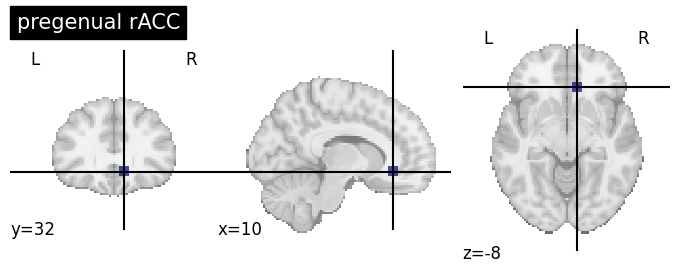

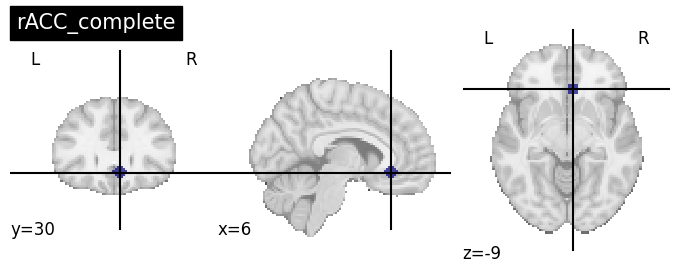

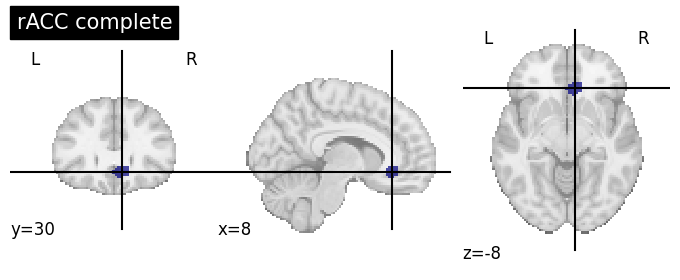

In [74]:
# pregenual rACC
rACCpregenual = [10, 32, -8]
rACCpregenual_sphere = create_sphere(rACCpregenual, radius=6)
plotting.plot_roi(rACCpregenual_sphere, title="pregenual rACC")

# subgenual rACC
rACCsubgenual = [6, 30, -9]
rACCsubgenual_sphere = create_sphere(rACCsubgenual, radius=6)
plotting.plot_roi(rACCsubgenual_sphere, title="rACC_complete")

# pregenual rACC and subgenual rACC
rACC_complete = [[10, 32, -8],[6, 30, -9]]
rACC_complete_sphere = create_sphere(rACC_complete, radius=6)
plotting.plot_roi(rACC_complete_sphere, title="rACC complete")

Reminder - these maps are 3 dimensional matrices filled with zeros and ones, depending on which voxels should be included/excluded.

In [78]:
rACC_complete_sphere.get_fdata()[:3,:3,:3]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

This allows us to use the math_img() function from nilearn to do mathematical operations on the values of these matrices. In this case, we want to combine them into one mask. To me, it felt easiest to calculate their sum, which results in a matrix of zeros, ones, and twos. Then, I used binarize_img() to binarize the Nifti image - this again results in matrix of zeros and ones.

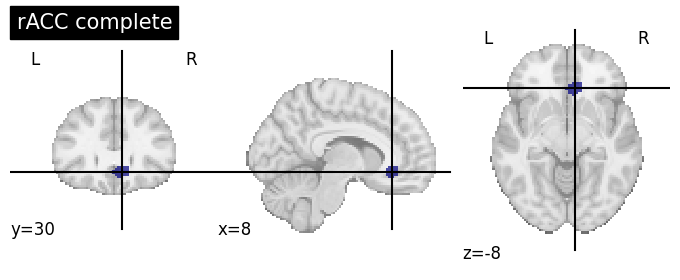

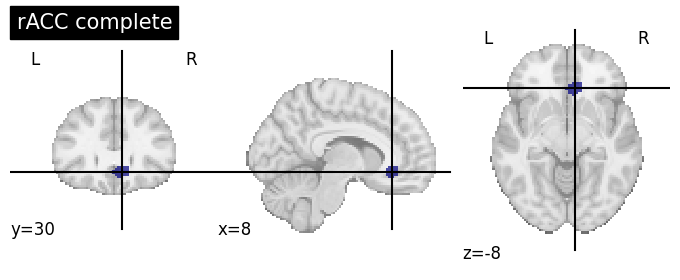

In [76]:
from nilearn.image import binarize_img, math_img

rACC_new = binarize_img(math_img("mask1+mask2", mask1=rACCsubgenual_sphere, mask2=rACCpregenual_sphere))
plotting.plot_roi(rACC_new, title="rACC new map")
plotting.plot_roi(rACC_complete_sphere, title="rACC complete")

In the case of this particular case, it might be easiest to just use the coordinates as we did in the beginning. However, maybe we want to use two regions for our ROI analysis which come from an atlas, such as the Harvard Oxford atlas.

In [83]:
atlas = datasets.fetch_atlas_harvard_oxford("cort-prob-2mm")

/usr/local/lib/python3.10/dist-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


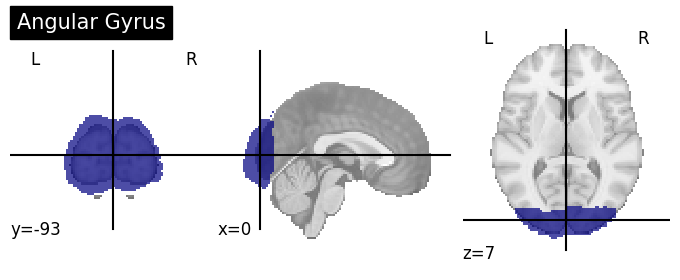

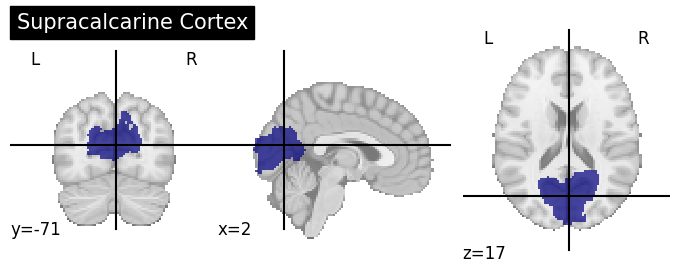

In [95]:
occipital_pole_idx = atlas.labels.index("Occipital Pole") - 1                             # getting index for occipital cortex, -1 to exclude "Background"
occipital_pole_mask = image.index_img(atlas.maps, occipital_pole_idx)                     # selecting 3D mask from 4D atlas (4th dimension: different regions)
occipital_pole_binarized = image.binarize_img(occipital_pole_mask, threshold="10%")       # binarizing the probabilistic mask

supr_cortex_idx = atlas.labels.index("Supracalcarine Cortex") - 1
supr_cortex_mask = image.index_img(atlas.maps, supr_cortex_idx)
supr_cortex_binarized = image.binarize_img(supr_cortex_mask, threshold="10%")

plotting.plot_roi(occipital_pole_binarized, title="Angular Gyrus")
plotting.plot_roi(supr_cortex_binarized, title="Supracalcarine Cortex")

/usr/local/lib/python3.10/dist-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


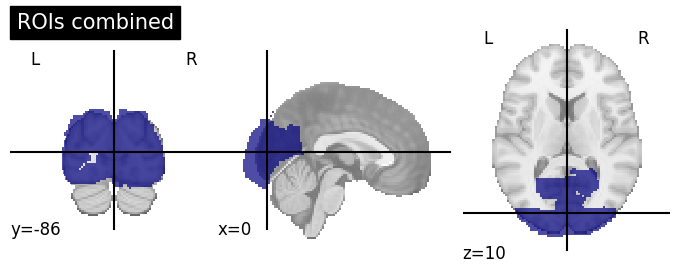

In [97]:
ROI_combined = binarize_img(math_img("mask1+mask2", mask1=occipital_pole_binarized, mask2=supr_cortex_binarized))
plotting.plot_roi(ROI_combined, title="ROIs combined")

Something else we might think to do is create a mask from the overlap of these two regions. Again, we can utilize the fact that our masks consists of zeros and ones. This time, we can use `math_img()` to multiply our masks.

/usr/local/lib/python3.10/dist-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


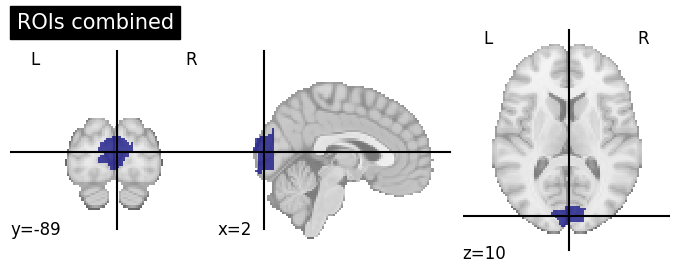

In [98]:
ROI_conjunction = binarize_img(math_img("mask1*mask2", mask1=occipital_pole_binarized, mask2=supr_cortex_binarized))
plotting.plot_roi(ROI_conjunction, title="ROIs combined")

One more example to show you an application: You could use this function to create a mask of the overlap of two thresholded contrast maps. In this case, we will create a mask of the overlap of activations when comparing a right button press condition with rest and left button press condition with rest.

*This is just an example to show you how something like this works - we are only looking at a singular subject (not second level analyses done) and are not doing any statistical thresholding.*

In [99]:
# Fetching datasets
left_button = datasets.fetch_localizer_contrasts(
    ["left button press"], n_subjects = 1)
right_button = datasets.fetch_localizer_contrasts(
    ["right button press"], n_subjects = 1)

 ...done. (2 seconds, 0 min)
/usr/local/lib/python3.10/dist-packages/nilearn/datasets/func.py:764: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


 ...done. (2 seconds, 0 min)
/usr/local/lib/python3.10/dist-packages/nilearn/datasets/func.py:764: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


/usr/local/lib/python3.10/dist-packages/nilearn/_utils/niimg.py:63: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


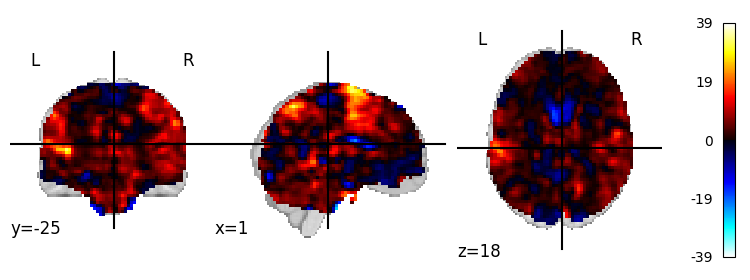

In [109]:
left_map = left_button.cmaps[0]
right_map = right_button.cmaps[0]
plotting.plot_stat_map(left_map)

We will now apply an arbitrary threshold for illustration purposes. We can luckily use `math_img() `for this as well.

In [128]:
left_threshold = math_img("img1>15", img1=left_map)
right_threshold = math_img("img1>15", img1=right_map)

Lets look at the resulting masks!

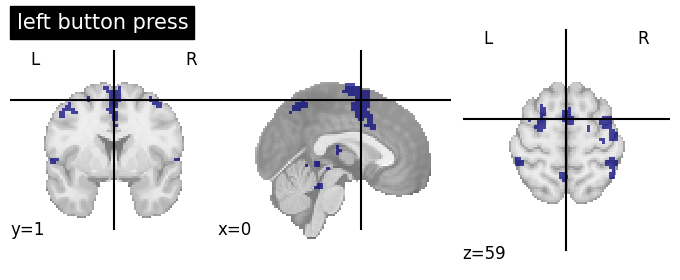

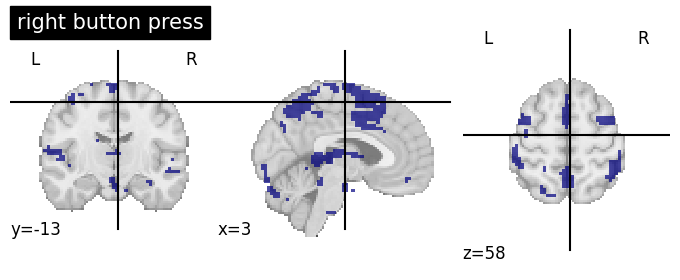

In [129]:
plotting.plot_roi(left_threshold, title = "left button press")
plotting.plot_roi(right_threshold, title = "right button press")

Using `math_img()`, we can now calculate the conjunction of the two deterministic masks.

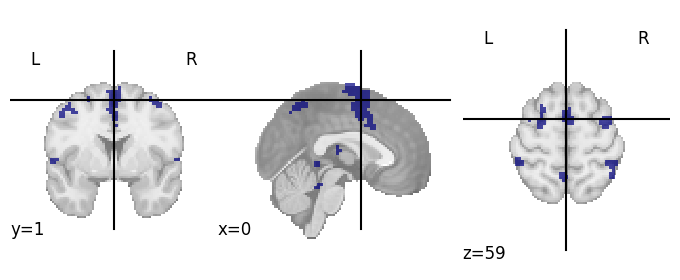

In [125]:
conjunction_left_right = math_img("mask1 * mask2", mask1=left_threshold, mask2=right_threshold)
plotting.plot_roi(conjunction_left_right)